In [49]:
import coloredlogs
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import scipy.optimize

from rspec.filter import wavelength_between
from rspec.io import open_thermo
from rspec.visualize.plotly import create_graph_obj

coloredlogs.install(
    level='DEBUG',
    fmt='%(asctime)s %(module)s[%(process)d] %(levelname)s %(message)s',
    datefmt='%H:%M:%S'
)

Load dataset

In [2]:
acetone = open_thermo("../data/raw/Acetone.txt")
hexane = open_thermo("../data/raw/Hexane.txt")
methanol = open_thermo("../data/raw/Methanol.txt")

10:22:11 thermo[95844] DEBUG "spectrum" contains 2048 rows
10:22:11 thermo[95844] DEBUG "spectrum" contains 2048 rows
10:22:11 thermo[95844] DEBUG "spectrum" contains 2048 rows


In [3]:
mix_1 = open_thermo("../data/raw/Acetone+Hexane.txt")

10:22:11 thermo[95844] DEBUG "spectrum" contains 2048 rows


Crop unwanted regions

In [4]:
wavelength = acetone['wavelength']
flags = wavelength.between(500, 2500)
i_flags = flags.index[flags]
i_start, i_end = i_flags[0], i_flags[-1]

In [5]:
_acetone = wavelength_between(acetone, 500, 2500)
_hexane = wavelength_between(hexane, 500, 2500)

_mix = wavelength_between(mix_1, 500, 2500)

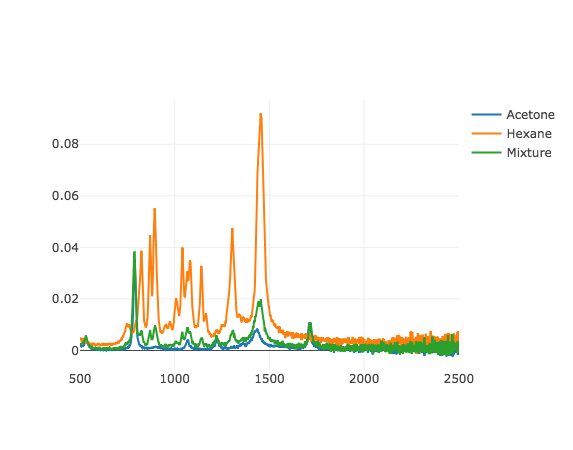

In [7]:
trace_acetone = create_graph_obj(_acetone, name='Acetone')
trace_hexane = create_graph_obj(_hexane, name='Hexane')

trace_mix = create_graph_obj(_mix, name='Mixture')

py.iplot([trace_acetone, trace_hexane, trace_mix], filename='pandas/basic-line-plot')

Solve y = Ax

In [76]:
A = np.vstack([
    _acetone['intensity'].values, 
    _hexane['intensity'].values
]).T
y = _mix['intensity'].values[np.newaxis].T
#y = _mix['intensity'].values

In [77]:
A.shape

(1327, 2)

In [78]:
y.shape

(1327, 1)

In [79]:
coefs, res, _, _ = np.linalg.lstsq(A, y, rcond=None)

In [80]:
den = np.sum(coefs)
percentage = coefs / den

In [88]:
for i, p in enumerate(percentage):
    print("[{}] {:.2f}%".format(i, np.asscalar(p)*100))

[0] 87.81%
[1] 12.19%


In [92]:
res = np.dot(A, percentage)

In [93]:
res.shape

(1327, 1)

In [ ]:
result = pd.DataFrame()

In [95]:
trace_acetone = create_graph_obj(_acetone, name='Acetone')
trace_hexane = create_graph_obj(_hexane, name='Hexane')

trace_mix = create_graph_obj(_mix, name='Mixture')

py.iplot([res], filename='pandas/basic-line-plot')

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [array([[ 0.002376  ],
       [ 0.00204451],
       [ 0.00188667],
       ...,
       [ 0.00058796],
       [-0.00081039],
       [ 0.00175135]], dtype=float32)]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth', 'cone',
                     'contour', 'contourcarpet', 'heatmap',
                     'heatmapgl', 'histogram', 'histogram2d',
                     'histogram2dcontour', 'mesh3d', 'ohlc',
                     'parcats', 'parcoords', 'pie', 'pointcloud',
                     'sankey', 'scatter', 'scatter3d',
                     'scattercarpet', 'scattergeo', 'scattergl',
                     'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'surface', 'table', 'violin']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])